In [2]:
import scipy.io
import os
import glob
import pandas as pd
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn import svm
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
from sklearnex import patch_sklearn 
import matplotlib.pyplot as plt
import seaborn as sns
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [3]:
def read_mat_file(filename):
    mat = scipy.io.loadmat(filename)
    # do something with the contents of the MATLAB file
    return mat

In [4]:
def read_mat_files(filenames):
    data = []
    for filename in filenames:
        data.append(read_mat_file(filename))
    return data

In [7]:
# benign_data_labels = ["Q1", "Q2", "Q4", "Q5", "Q6", "Q7", "Q9", "Q10", "Q11", "Q13", "Q14", "Q16", "Q20", "Q21", "Q27", "Q34", "Q35", "Q37", "Q38", "Q40", "Q42", "Q43", "Q46", "Q49", "Q50", "Q52", "Q54", "Q56", "Q59", "Q62", "Q63", "Q65", "Q66", "Q67", "Q69"]
# Use every 1/4 pixels so we still include every patient
benign_data_labels = ["Q1"]
scc_data_labels = ["Q3"]
target = []
data = []

benign_dict = {}
normal_dict = {}

for label in scc_data_labels:
    data_lesion = read_mat_files(glob.glob("/Users/byronpetselis/Desktop/Cancer_Data/Yeoh/scc/" + label + "_*_lesion*"))
    feat_15 = []
    feat_length = 0
    
    for feature in range(15):
        print(type(data_lesion[feature]))
        feat_name = list(data_lesion[feature].keys())[3]
        # '__header__', '__version__', '__globals__', 'tfast390m' are the key names
        feat_vals = data_lesion[feature][feat_name][0]
        # get 160x160 1D array associated with key name, [0] to get rid of nesting
        feat_15.append(feat_vals)
        # appends 160x160 1D array to array of 15 iteratively
        feat_length = len(feat_vals)
        # get actual length of 160x160 1D array
    
    feat_reshape = np.reshape(feat_15, (feat_length, 15))
    # reshapes (15, 160x160) to (160x160, 15) 2D array
    print(data_lesion)
    
#     target_app = [0] * feat_length
#     data.append(feat_reshape)
    
    for row in range(feat_length):
        if row % 2 == 0:
            target.append(1)
            data.append(feat_reshape[row])

for label in benign_data_labels:
    data_normal = read_mat_files(glob.glob("/Users/byronpetselis/Desktop/Cancer_Data/Yeoh/ben/" + label + "_*_lesion*"))
    feat_15 = []
    feat_length = 0
    
    for feature in range(15):
        feat_name = list(data_normal[feature].keys())[3]
        feat_vals = data_normal[feature][feat_name][0]
        feat_15.append(feat_vals)
        feat_length = len(feat_vals)
    
    feat_reshape = np.reshape(feat_15, (feat_length, 15))
        
    for row in range(feat_length):
        if row % 2 == 0:
            target.append(0)
            data.append(feat_reshape[row])
            
print(len(data))
print(f"SCC: {target.count(1)}")
print(f"Benign: {target.count(0)}")

<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
<class 'dict'>
[{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 29 16:22:22 2022', '__version__': '1.0', '__globals__': [], 'tfast390m': array([[0.25      , 0.30191652, 1.31543801, ..., 0.52053115, 0.25      ,
        0.25      ]])}, {'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 29 16:22:22 2022', '__version__': '1.0', '__globals__': [], 'tslow390m': array([[4.80969176, 4.88590224, 5.97426975, ..., 4.92397759, 4.69734523,
        4.55142349]])}, {'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Nov 29 16:22:22 2022', '__version__': '1.0', '__globals__': [], 'LT500m': array([[6.18067317, 6.3444078 , 6.18972428, ..., 5.89685306, 5.73091914,
        5.87050418]])}, {'__header__': b'MATLAB 5.0 MAT-file

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(data, target, test_size=0.2, random_state=209)

In [7]:
accuracy = []
precision = []
recall = []

testing_range = np.linspace(0.1,1,20)

for gamma_value in testing_range:
    cls = svm.SVC(kernel='rbf', gamma=gamma_value, C=1, verbose=1)
    cls.fit(X_train, Y_train)
    pred = cls.predict(X_test)
    accuracy.append(metrics.accuracy_score(Y_test,pred))
    # Accuracy: How many were right?
    precision.append(metrics.precision_score(Y_test,pred))
    # Precision: Out of all '1' predictions, how many were right?
    recall.append(metrics.recall_score(Y_test,pred))
    # Recall: Out of all '1' truths, how many were right?

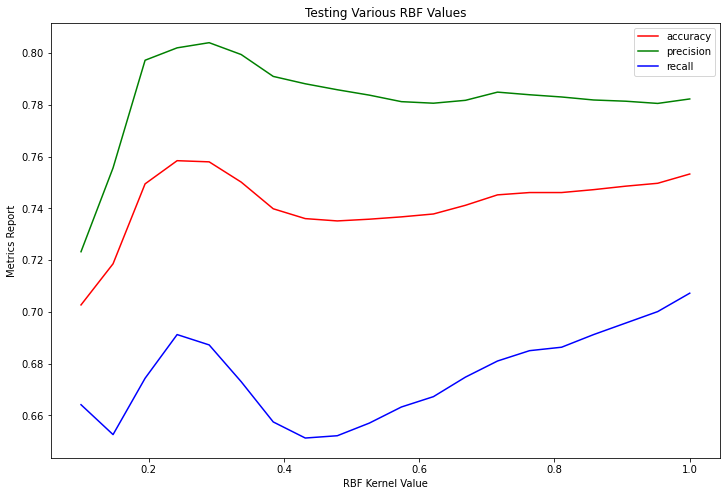

In [8]:
plt.figure(figsize=(12, 8))

plt.plot(testing_range, accuracy, color='r', label='accuracy')
plt.plot(testing_range, precision, color='g', label='precision')
plt.plot(testing_range, recall, color='b', label='recall')

plt.xlabel("RBF Kernel Value")
plt.ylabel("Metrics Report")
plt.title("Testing Various RBF Values")

plt.legend()